In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from string import ascii_uppercase
import itertools
import random
random.seed(2023 - 2 - 21)

## ***Distance is about how far is one node from another?***

In [2]:
# to answer this one needs a concept of paths
# a path is a way to move from one node to a target node through connecting edges.

In [3]:
edges = [tuple(sorted(pair)) for pair in itertools.product(ascii_uppercase[:10], ascii_uppercase[20:]) if (pair[0] != pair[1])]


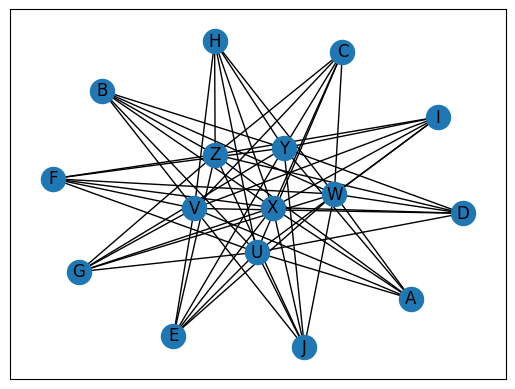

In [4]:
city = nx.Graph()
# city.add_edges_from(random.sample(edges, k = 30))
city.add_edges_from(edges)
nx.draw_networkx(city)

In [5]:
# so, a path length is defined as the number of edges one needs to traverse to get to the target node from the start node
# this path has to be the shortest possible path.
# in netwrokx, one can use the function shortest_path to find the shortest path between any two nodes

nx.shortest_path(city, "A", "B")

['A', 'U', 'B']

In [6]:
nx.shortest_path_length(city, "A", "B")

2

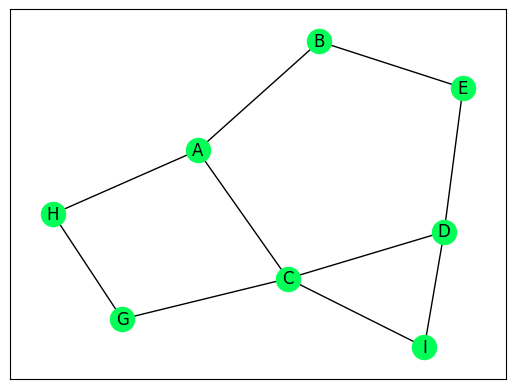

In [7]:
# at times, you'll be interested to see the distances from a given node to all the other nodes in a network
# this is fairly easy for small networks, bute becomes tedious for large, complex networks!

# this can be done with a breadth first search in large networks.
# breadth first search starts at a given node and discovers closest neighbour nodes (nodes in layers based on the proximity to 
# the start node)

graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("A", "C"), ("C", "D"), ("D", "E"), ("E", "B"), ("C", "G"), ("G", "H"), ("H", "A"),
                     ("C", "I"), ("D", "I")])
nx.draw_networkx(graph, node_color = "#03FF57")

In [8]:
# let's find shortest path lengths from node H

# at first we discover the nodes A & G (immediately near the start node) - a distance of 1
# layer one nodes - A & G

# next process node A,
# we now discover nodes B & C
# then process node G,
# we discover a node C
# since C was already discovered we didn't find anything new.
# so, layer two nodes - B & C

# let's next process the node B
# B is connected to node E
# processing node C
# we discover nodes D and I
# so, layer three nodes are D, E & I

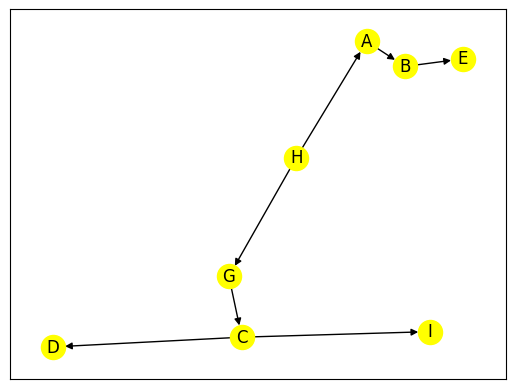

In [13]:
# to do this in networkx

breadth_first = nx.bfs_tree(graph, "H")
nx.draw_networkx(breadth_first, node_color = "yellow")

In [14]:
nx.shortest_path_length(graph, "H")

{'H': 0, 'G': 1, 'A': 1, 'C': 2, 'B': 2, 'I': 3, 'D': 3, 'E': 3}

In [17]:
# now that we have seen how to measure distances between a pair of nodes and distances from a given node to all other nodes,
# how to measure the average distance in a network?

# first method is, similar to averaging lccs to get the gcc
# find the average of all the shortest path length (shortest paths from all possible pairs of nodes)

nx.average_shortest_path_length(graph)

1.8571428571428572

In [1]:
# the longest shortest path length in a network is called a diameter

nx.diameter(graph)

NameError: name 'nx' is not defined

In [20]:
# the length of the longest shortest path from a given node is called eccentricity

nx.eccentricity(graph)

{'A': 2, 'B': 3, 'C': 2, 'D': 3, 'E': 3, 'G': 3, 'H': 3, 'I': 3}

In [22]:
# the smallest of eccentricities is called radius

nx.radius(graph)

2

In [23]:
# periphery is the list of nodes that are at the perimeter of the network
# they have an eccentricity equal to the diameter of the network

nx.periphery(graph)

['B', 'D', 'E', 'G', 'H', 'I']

In [24]:
# center is the list of nodes that are at the centre of the network
# they have eccentricities equal to the radius

nx.center(graph)

['A', 'C']

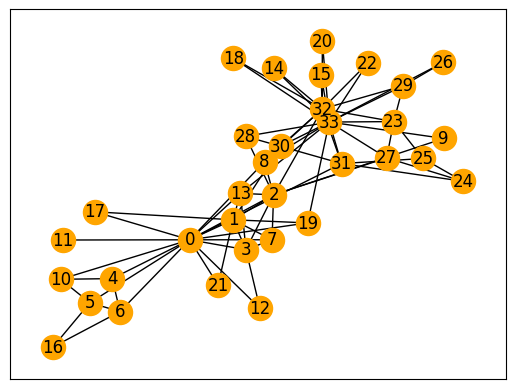

In [48]:
# let's examine the Karate club network

karate = nx.karate_club_graph()
positions = nx.spring_layout(karate)
nx.draw_networkx(karate, pos = positions, node_color = "orange")

In [49]:
nx.eccentricity(karate)

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 3,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 3,
 14: 5,
 15: 5,
 16: 5,
 17: 4,
 18: 5,
 19: 3,
 20: 5,
 21: 4,
 22: 5,
 23: 5,
 24: 4,
 25: 4,
 26: 5,
 27: 4,
 28: 4,
 29: 5,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

In [55]:
nx.radius(karate)

3

In [50]:
nx.diameter(karate)

5

In [51]:
nx.center(karate)

[0, 1, 2, 3, 8, 13, 19, 31]

In [52]:
nx.periphery(karate)

[14, 15, 16, 18, 20, 22, 23, 26, 29]

In [54]:
nx.shortest_path_length(karate, 14)

{14: 0,
 32: 1,
 33: 1,
 2: 2,
 8: 2,
 9: 2,
 13: 2,
 15: 2,
 18: 2,
 19: 2,
 20: 2,
 22: 2,
 23: 2,
 26: 2,
 27: 2,
 28: 2,
 29: 2,
 30: 2,
 31: 2,
 0: 3,
 1: 3,
 3: 3,
 7: 3,
 24: 3,
 25: 3,
 4: 4,
 5: 4,
 6: 4,
 10: 4,
 11: 4,
 12: 4,
 17: 4,
 21: 4,
 16: 5}